# Lab: Build Neural Networks via Pytorch

The purpose of this assignment is to learn how to build neural networks using PyTorch, focusing on both the theoretical and practical aspects of the process.

One key step involves passing the output of a regression model through the Sigmoid function. This operation transforms the raw output (often called the logit) into a probability value between 0 and 1, which represents the likelihood of an observation belonging to the positive class. 

This step is particularly important in binary classification tasks, as it allows us to interpret the model's predictions in probabilistic terms and enables subsequent evaluation using metrics such as accuracy or binary cross-entropy loss.

## Imports
<hr>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torchsummary import summary
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import make_regression, make_circles, make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

## Neural Network Classification
<hr>

### 1. Binary Classification

We will build a binary classification model using PyTorch. The output of the regression model will be passed through the Sigmoid function to convert it into a value between 0 and 1, representing the probability that an observation belongs to the positive class.

#### PyTorch Tensor

Please convert your input data, X (features) and y (labels), into PyTorch tensors so they can be used with PyTorch models.

X_t and y_t are created as tensors with the data type torch.float32, which is required for most machine learning tasks in PyTorch.

In [2]:
X, y = make_circles(n_samples=300, factor=0.5, noise=0.1, random_state=2020)

# Your code for tensor
X_t = torch.tensor(X, dtype=torch.float32)
y_t = torch.tensor(y, dtype=torch.float32)

#### TensorDataset
Use PyTorch's TensorDataset and DataLoader to prepare the dataset for training, including batching and shuffling.

Requirements:

Combine X_t and y_t into a dataset using TensorDataset.

Use DataLoader to create batches of data for training. The batch size should be specified by the variable 45.
Enable shuffle=True in the DataLoader to randomize the order of data for each epoch.

In [15]:
# Create dataloader
# Your code for TensorDataset and dataloader
batchSize = 45
dataset = TensorDataset(X_t, y_t)

dataloader = DataLoader(dataset, batch_size=batchSize, shuffle=True)

#### Visualize your circular dataset

Visualize your circular dataset with the following requirements:

- The figure size should be set to 5×5.
- Data points with y = 0 should be marked in blue, and those with y = 1 should be marked in red.
- Both the x-axis and y-axis labels should have a font size of 14.

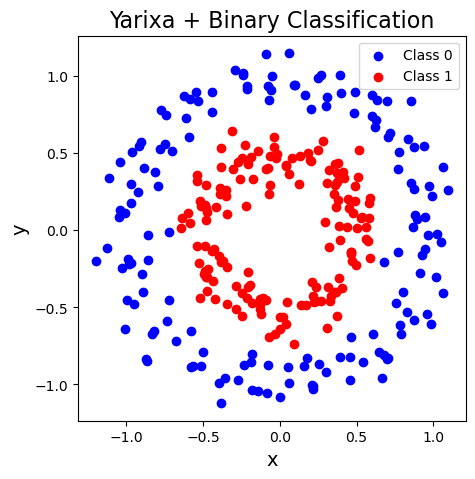

In [16]:
# Plot each class
# Your code plot with scatter
plt.figure(figsize=(5, 5))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1')

# Add Label and title
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.title("Yarixa + Binary Classification", fontsize=16)
plt.legend()
plt.show()
# Your code set graph axises

We're going to start using `ReLU` as our activation function(s) and `Adam` as our optimizer because these are what are currently, commonly used in practice. We are doing classification now so we'll need to use log loss (binary cross entropy) as our loss function:

$$f(w) = \sum_{x,y \in D} -y log(\hat{y}) - (1-y)log(1-\hat{y})$$

#### Create Neural Network 

Implement a neural network class for binary classification using PyTorch's nn.Module.

- Create a fully connected layer that maps the input features to the hidden layer.
- Use Relu as activation
- Create another fully connected layer
- Use Sigmoid


In [27]:
class binaryClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.main = nn.Sequential(
            # fully connected layer
            nn.Linear(input_size, hidden_size),

            # activation function
            nn.ReLU(),
            
            # fully connected layer
            nn.Linear(hidden_size, output_size),

            # sigmoid activation
            nn.Sigmoid()
        )

    def forward(self, x):
        out = self.main(x)
        return out

#### Build trainer

Implement a simple training wrapper for a PyTorch network that handles the forward pass, backpropagation, and parameter updates for multiple epochs.

Training Process:

Epoch Loop: 
- Iterate over the specified number of epochs.

Batch Loop:
- Iterate over batches of X and y from the dataloader.
- Clear the gradients using optimizer.zero_grad().
- Perform a forward pass:
- Use the model to compute predictions (y_hat).
- Flatten the output to match the expected shape if necessary.
- Calculate the loss using criterion(y_hat, y).
- Perform backpropagation with loss to compute gradients.
- Update model parameters using optimizer.step().
- Accumulate the loss for the batch into a running total.

Logging:
- At the end of each epoch, compute and print the average loss over all batches if verbose is True.

In [45]:
def trainer(model, criterion, optimizer, dataloader, epochs=5, verbose=True):
    """
        simple training wrapper for a PyTorch network
    """
    # You may review the ipynb file from Week 6

    # Your code
    for epoch in range(epochs):
        losses = 0
        for X, y in dataloader:
            optimizer.zero_grad()       # Clear gradients w.r.t. parameters
            y_hat = model(X).flatten    # Forward pass to get output
            loss = criterion(y_hat, y)  # Calculate loss
            loss.backward()             # Getting gradients w.r.t. parameters
            optimizer.step()            # Update parameters
            losses += loss.item()       # Add loss for this batch to running total
        if verbose: print(f"epoch: {epoch + 1}, loss: {losses / len(dataloader):.4f}")

In PyTorch, the binary cross entropy loss criterion is `torch.nn.BCELoss`. The formula expects a "probability" which is why we add a Sigmoid function to the end of out network.

In [46]:
LEARNING_RATE = 0.1
criterion = nn.BCELoss()  # loss function - binary cross entropy loss
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)  # optimization algorithm - Adam

Let's train the model:

In [47]:
# Your code
# set your mode with 2 input layers, 6 hidden layers, and 1 output layers via binaryClassifier class
model = binaryClassifier(input_size=2, hidden_size=6, output_size=1)

#### Activation functions

We're going to using `ReLU` as our activation function(s) and `Adam` as our optimizer because these are what are currently, commonly used in practice. We are doing classification now so we'll need to use log loss (binary cross entropy) as our loss function:

$$f(w) = \sum_{x,y \in D} -y log(\hat{y}) - (1-y)log(1-\hat{y})$$

In PyTorch, the binary cross entropy loss criterion is `torch.nn.BCELoss`. The formula expects a "probability" which is why we add a Sigmoid function to the end of out network.

In [76]:
LEARNING_RATE = 0.1
criterion = torch.nn.BCELoss() # loss function
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)  # optimization algorithm

In [77]:
# build your trainer funtion with model, criterion, optimizer, dataloader, epochs=30, verbose=True
# Your code
epoch_losses = []

def trainer(model, criterion, optimizer, dataloader, epochs=30, verbose=True):
    """
        simple training wrapper for a PyTorch network
    """
    # You may review the ipynb file from Week 6

    # Your code
    for epoch in range(epochs):
        losses = 0
        for X, y in dataloader:
            optimizer.zero_grad()       # Clear gradients w.r.t. parameters
            y_hat = model(X).flatten()    # Forward pass to get output
            loss = criterion(y_hat, y)  # Calculate loss
            loss.backward()             # Getting gradients w.r.t. parameters
            optimizer.step()            # Update parameters
            losses += loss.item()       # Add loss for this batch to running total

        epoch_losses.append(losses / len(dataloader))
            
        if verbose: print(f"epoch: {epoch + 1}, loss: {losses / len(dataloader):.4f}")

#### Visualize your results 

#### Part 1: Loss Curve

- Please plot the loss curve during training.
- Your graph needs to be labeled with x-axis, y-axis, and title.
- The title needs to include your first name.
- Your graph needs to have a legend and a grid.

epoch: 1, loss: 0.7082
epoch: 2, loss: 0.6564
epoch: 3, loss: 0.5820
epoch: 4, loss: 0.4946
epoch: 5, loss: 0.3933
epoch: 6, loss: 0.3185
epoch: 7, loss: 0.2380
epoch: 8, loss: 0.1784
epoch: 9, loss: 0.1321
epoch: 10, loss: 0.1036
epoch: 11, loss: 0.0836
epoch: 12, loss: 0.0677
epoch: 13, loss: 0.0607
epoch: 14, loss: 0.0436
epoch: 15, loss: 0.0415
epoch: 16, loss: 0.0373
epoch: 17, loss: 0.0350
epoch: 18, loss: 0.0328
epoch: 19, loss: 0.0295
epoch: 20, loss: 0.0281
epoch: 21, loss: 0.0274
epoch: 22, loss: 0.0273
epoch: 23, loss: 0.0237
epoch: 24, loss: 0.0232
epoch: 25, loss: 0.0225
epoch: 26, loss: 0.0225
epoch: 27, loss: 0.0249
epoch: 28, loss: 0.0241
epoch: 29, loss: 0.0190
epoch: 30, loss: 0.0183


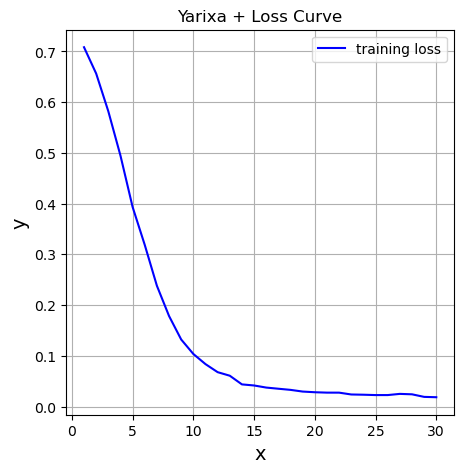

In [79]:
# Your code
trainer(model, criterion, optimizer, dataloader, epochs=30, verbose=True)

# loss curve
plt.figure(figsize=(5, 5))
plt.plot(range(1, len(epoch_losses) + 1), epoch_losses, label='training loss', color='blue')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.title('Yarixa + Loss Curve')
plt.legend()
plt.grid()

### Part 2: Actual and predicted data 

- Please plot the Actual and predicted data after training.
- Your graph needs to be labeled with x-axis, y-axis, and title.
- The title needs to include your first name.
- Your graph needs to have a legend and a grid.

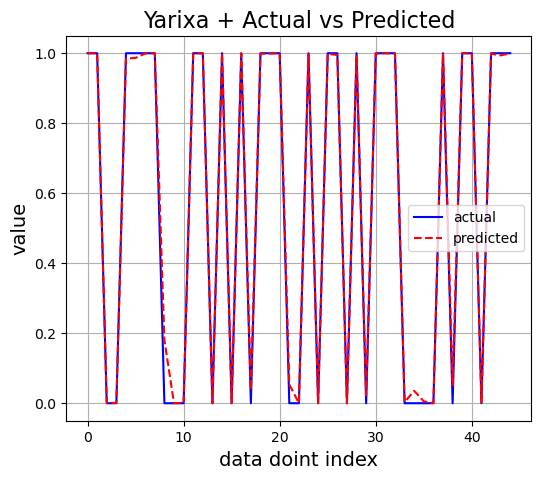

In [81]:
# Your code
def actual_predicted(model, dataloader):
    model.eval()  # set the model to evaluation mode
    with torch.no_grad():  # no need to track gradients for plotting
        # Get a batch of data
        X, y = next(iter(dataloader))  # get the first batch
        
        # get model predictions
        y_hat = model(X).flatten()
        
        # glot actual vs predicted data
        plt.figure(figsize=(6, 5))
        plt.plot(y.cpu().numpy(), label='actual', color='blue')
        plt.plot(y_hat.cpu().numpy(), label='predicted', color='red', linestyle='--')
        plt.xlabel('data doint index', fontsize=14)
        plt.ylabel('value', fontsize=14)
        plt.title('Yarixa + Actual vs Predicted', fontsize=16)  # Replace 'Yarixa' with your first name
        plt.legend()
        plt.grid(True)
        plt.show()

actual_predicted(model, dataloader)

To be clear, our model is just outputting some number between -1 and +1 (we are applying Sigmoid in the model), so:
- To get the probabilities we would need to pass them through a Sigmoid;
- To get classes, we can apply some threshold (usually 0.5) to this probability.

For example, we would expect the point (0,0) to have a high probability and the point (-1,-1) to have a low probability:

In [85]:
prediction = X_t.flatten()
print(prediction)

tensor([-3.4758e-01, -4.7947e-01, -8.8957e-02,  3.9925e-01, -1.9660e-02,
         4.9685e-01, -2.5765e-01,  3.3594e-01, -1.1273e+00, -1.1658e-01,
         3.2519e-01, -4.5880e-01, -1.4268e-01, -1.0405e+00,  4.6046e-01,
        -1.3879e-01, -2.8761e-01, -3.6240e-01, -1.0996e-01, -4.3669e-01,
         2.6716e-01,  1.0061e+00,  3.1496e-01, -3.6893e-01,  2.0831e-01,
        -3.3605e-01,  6.2875e-01,  7.1543e-01, -3.5772e-01, -9.5776e-01,
        -9.7364e-01,  1.7513e-01,  6.1805e-01,  6.6860e-01, -5.1280e-01,
         1.5998e-01,  8.5531e-01,  3.0783e-01,  9.6832e-01, -3.3099e-02,
         5.1479e-01,  5.2271e-01, -3.8217e-01,  5.3500e-01, -9.1944e-01,
         5.4978e-01, -1.2963e-01, -4.7992e-01,  2.4431e-04, -6.4223e-01,
         4.6739e-01, -1.9820e-01, -3.7315e-02,  5.3860e-01, -4.7537e-01,
         1.1900e-01, -1.9302e-01, -3.5165e-01, -8.1936e-01, -6.5359e-01,
        -2.2794e-01,  5.5090e-01,  3.0356e-01,  8.0456e-01,  5.3323e-01,
         8.8279e-02,  2.4976e-01,  9.9023e-01, -6.3

In [86]:
probability = torch.sigmoid(prediction)
print(probability)

tensor([0.4140, 0.3824, 0.4778, 0.5985, 0.4951, 0.6217, 0.4359, 0.5832, 0.2447,
        0.4709, 0.5806, 0.3873, 0.4644, 0.2611, 0.6131, 0.4654, 0.4286, 0.4104,
        0.4725, 0.3925, 0.5664, 0.7322, 0.5781, 0.4088, 0.5519, 0.4168, 0.6522,
        0.6716, 0.4115, 0.2773, 0.2742, 0.5437, 0.6498, 0.6612, 0.3745, 0.5399,
        0.7017, 0.5764, 0.7248, 0.4917, 0.6259, 0.6278, 0.4056, 0.6306, 0.2851,
        0.6341, 0.4676, 0.3823, 0.5001, 0.3447, 0.6148, 0.4506, 0.4907, 0.6315,
        0.3833, 0.5297, 0.4519, 0.4130, 0.3059, 0.3422, 0.4433, 0.6343, 0.5753,
        0.6909, 0.6302, 0.5221, 0.5621, 0.7291, 0.3457, 0.5198, 0.3826, 0.5727,
        0.6565, 0.3125, 0.3489, 0.7050, 0.7064, 0.5256, 0.5204, 0.6151, 0.4380,
        0.6146, 0.5794, 0.4732, 0.3748, 0.2937, 0.5898, 0.4015, 0.2718, 0.4450,
        0.3215, 0.6372, 0.5968, 0.7327, 0.4317, 0.6099, 0.2748, 0.4479, 0.3703,
        0.6989, 0.2704, 0.4537, 0.5408, 0.7070, 0.2976, 0.4526, 0.5333, 0.6178,
        0.4532, 0.2986, 0.4381, 0.4004, 

In [87]:
classes = np.where(probability > 0.5, 1, 0)
print(classes)

[0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1
 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0
 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0
 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1
 1 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 0
 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 1
 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1
 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0
 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1
 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0
 0 1 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0
 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0
 1 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0
 1 1 0 0 1 1 1 0 1 1 1 1 

### 2. Multiclass Classification

For multiclass classification, we'll need the softmax function:

$$\sigma(\vec{z})_i=\frac{e^{z_i}}{\sum_{j=1}^{K}e^{z_j}}$$

It basically outputs probabilities for each class we wish to predict, and they all sum to 1. 

`torch.nn.CrossEntropyLoss` is a loss that combines a softmax with cross entropy loss. 

Let's try a 4-class classification problem using the following network:


In [88]:
X, y = make_blobs(n_samples=200, centers=4, center_box=(-1.2, 1.2), cluster_std=[0.15, 0.15, 0.15, 0.15], random_state=12345)
X_t = torch.tensor(X, dtype=torch.float32)
y_t = torch.tensor(y, dtype=torch.long)

# Create dataloader
dataset = TensorDataset(X_t, y_t)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [89]:
class multiClassifier(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.main = torch.nn.Sequential(
            torch.nn.Linear(input_size, hidden_size),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_size, output_size)
        )

    def forward(self, x):
        out = self.main(x)
        return out

#### Visualize your circular dataset

Visualize your circular dataset with the following requirements:

- The figure size should be set to 5×5.
- Both the x-axis and y-axis labels should have a font size of 14.

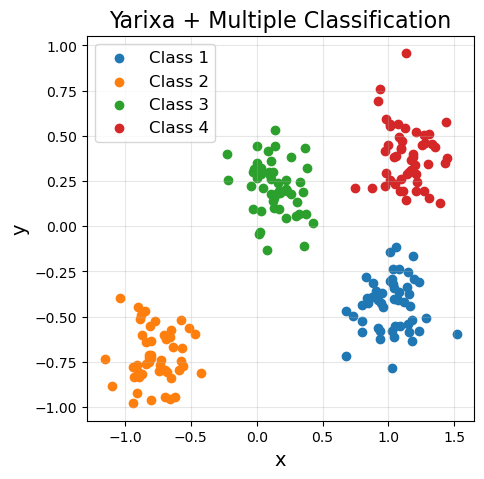

In [90]:
# Plot each class
# Your code plot with scatter
plt.figure(figsize=(5, 5))
for i in range(4):
    plt.scatter(X[y == i, 0], X[y == i, 1], label=f"Class {i+1}")

# Add Label and title
plt.title("Yarixa + Multiple Classification", fontsize=16)
# Your code
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

Let's train this model:

In [95]:
# model with 2 input layers, 6 hidden layers, and 4 output layers via multiClassifier class
# Your code 
model_2 = multiClassifier(input_size=2, hidden_size=6, output_size=4)

# Your code 
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(), lr=0.2)

accuracy_history = []

for epoch in range(10):
    correct = 0
    total = 0
    losses = 0
    for X_batch, y_batch in dataloader:
        optimizer.zero_grad()       # Clear gradients w.r.t. parameters
        output = model_2(X_batch)   # Forward pass to get output
        loss = criterion(output, y_batch)  # Calculate loss
        loss.backward()             # Getting gradients w.r.t. parameters
        optimizer.step()            # Update parameters
        losses += loss.item()       # Add loss for this batch to running total
        
        _, predicted = torch.max(output, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()
    
    accuracy = correct / total
    accuracy_history.append(accuracy)
    
    print(f"epoch: {epoch + 1}, loss: {losses / len(dataloader):.4f}")

epoch: 1, loss: 0.8078
epoch: 2, loss: 0.1017
epoch: 3, loss: 0.0151
epoch: 4, loss: 0.0053
epoch: 5, loss: 0.0024
epoch: 6, loss: 0.0015
epoch: 7, loss: 0.0012
epoch: 8, loss: 0.0010
epoch: 9, loss: 0.0007
epoch: 10, loss: 0.0006


#### Visualize your results 

### Part 3: Accuracy Curve for 4 classes

- Please plot the Accuracy Curve during training.
- Your graph needs to be labeled with x-axis, y-axis, and title.
- The title needs to include your first name.
- Your graph needs to have a legend and a grid.

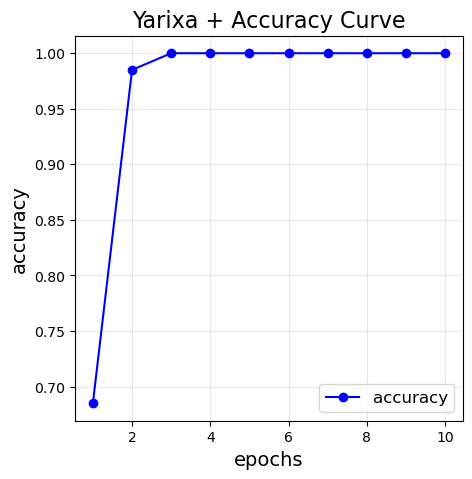

In [96]:
# Your code
plt.figure(figsize=(5, 5))
plt.plot(range(1, 11), accuracy_history, label="accuracy", color='b', marker='o')
plt.title("Yarixa + Accuracy Curve", fontsize=16)
plt.xlabel("epochs", fontsize=14)
plt.ylabel("accuracy", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

### Part 4: Actual and predicted data for classes

- Please plot the Actual and predicted data after training.
- Your graph needs to be labeled with x-axis, y-axis, and title.
- The title needs to include your first name.
- Your graph needs to have a legend and a grid.

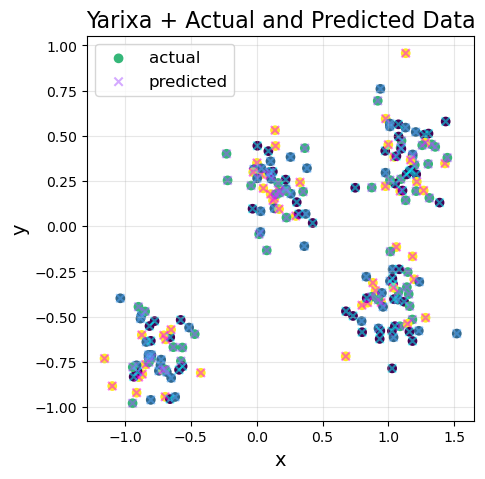

In [97]:
# Your code
model_2.eval()
with torch.no_grad():
    predicted_classes = []
    actual_classes = []
    
    for X_batch, y_batch in dataloader:
        output = model_2(X_batch)
        _, predicted = torch.max(output, 1)
        
        predicted_classes.extend(predicted.numpy())
        actual_classes.extend(y_batch.numpy())

# plot Actual and Predicted data for classes
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=actual_classes, label="actual", cmap='viridis', marker='o')
plt.scatter(X[:, 0], X[:, 1], c=predicted_classes, label="predicted", cmap='cool', marker='x', alpha=0.5)
plt.title("Yarixa + Actual and Predicted Data", fontsize=16)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()